In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [ ]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [ ]:
# !pip install x

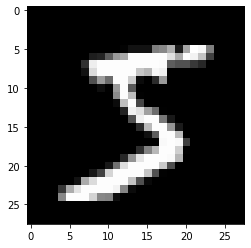

In [ ]:
import matplotlib.pyplot as plt


plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))

In [ ]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [ ]:

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 15s 246us/step - loss: 0.2656 - accuracy: 0.9197 - val_loss: 0.0564 - val_accuracy: 0.9814
Epoch 2/12
60000/60000 [==============================] - 9s 144us/step - loss: 0.0912 - accuracy: 0.9731 - val_loss: 0.0382 - val_accuracy: 0.9870
Epoch 3/12
60000/60000 [==============================] - 9s 144us/step - loss: 0.0671 - accuracy: 0.9803 - val_loss: 0.0381 - val_accuracy: 0.9873
Epoch 4/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.0545 - accuracy: 0.9835 - val_loss: 0.0309 - val_accuracy: 0.9891
Epoch 5/12
60000/60000 [==============================] - 9s 142us/step - loss: 0.0479 - accuracy: 0.9852 - val_loss: 0.0282 - val_accuracy: 0.9905
Epoch 6/12
60000/60000 [==============================] - 9s 144us/step - loss: 0.0430 - accuracy: 0.9871 - val_loss: 0.0274 - val_accuracy: 0.9918
Epoch 7/12
60000/60000 [==============================] - 9s 

In [ ]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.029126551958299707
Test accuracy: 0.9915000200271606
